In [1]:
# Teamname: Julius&Markus
# Fullnames: Adam Julius Olof Kviman & Markus Ola Holte Granheim 

In [14]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sb
import tensorflow
import tensorflow_addons as tfa
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from itertools import compress
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

In [3]:
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from tensorflow.keras import backend as K

    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())


def r_square_loss(y_true, y_pred):
    from tensorflow.keras import backend as K

    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - (1 - SS_res / (SS_tot + K.epsilon()))

In [4]:
# load data
x_train = pd.read_csv("./dat300-h2020-ca1/X_train.csv")
x_test = pd.read_csv("./dat300-h2020-ca1/X_test.csv")
y_train = pd.read_csv("./dat300-h2020-ca1/y_train.csv")

In [5]:
# x_train inspection
x_train.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
count,618.000000,618.00000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,279.573220,73.95966,54.507945,181.851537,6.047505,974.788350,770.756197,45.991909
std,106.241869,85.24380,63.763533,20.947062,5.910278,75.538967,80.024256,64.971643
min,102.000000,0.00000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000
25%,190.085000,0.00000,0.000000,165.865000,0.000000,932.000000,721.375000,7.000000
50%,272.700000,22.00000,0.000000,185.000000,6.275000,968.000000,778.450000,28.000000
75%,350.000000,143.00000,117.540000,192.000000,10.000000,1028.400000,822.000000,56.000000
max,540.000000,316.10000,200.100000,246.900000,32.200000,1134.300000,992.600000,365.000000


In [6]:
# x_test inspection
x_test.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,283.554248,73.799223,53.705922,181.138592,6.436522,970.113956,777.812913,45.167476
std,101.931109,87.913388,64.418958,21.972857,6.066806,80.974799,80.312789,60.441229
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,3.000000
25%,202.000000,0.000000,0.000000,164.022500,0.000000,932.000000,746.025000,14.000000
50%,275.035000,22.000000,0.000000,185.700000,6.435000,966.500000,780.100000,28.000000
75%,355.225000,142.575000,118.310000,193.000000,10.910000,1034.750000,830.750000,56.000000
max,540.000000,359.400000,194.900000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [7]:
# y_train inspection
y_train.describe()

,"Concrete compressive strength(MPa, megapascals)"
count,618.000000
mean,35.379932
std,16.276264
min,4.782206
25%,23.849492
50%,34.266957
75%,44.520204
max,81.751169


In [8]:
# check for NaN 
print(f"Number of NaN in x_train: {sum(x_train.isnull().sum())}")
print(f"Number of NaN in y_train: {sum(y_train.isnull().sum())}")
print(f"Number of NaN in x_test: {sum(x_test.isnull().sum())}")

Number of NaN in x_train: 0
Number of NaN in y_train: 0
Number of NaN in x_test: 0


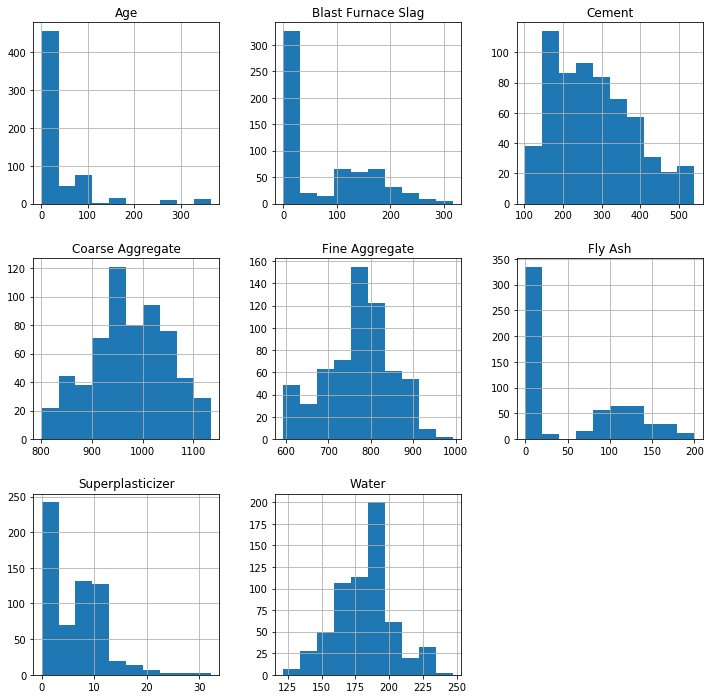

In [9]:
# x_train histogram
# we remove units to prevent titles from merging
# to see units, look at earlier cells
columns = [
    "Cement",
    "Blast Furnace Slag",
    "Fly Ash",
    "Water",
    "Superplasticizer",
    "Coarse Aggregate",
    "Fine Aggregate",
    "Age",
]
x_train_no_unit = pd.DataFrame(x_train.values, columns=columns)
x_train_hist = x_train_no_unit.hist(figsize=(12, 12))

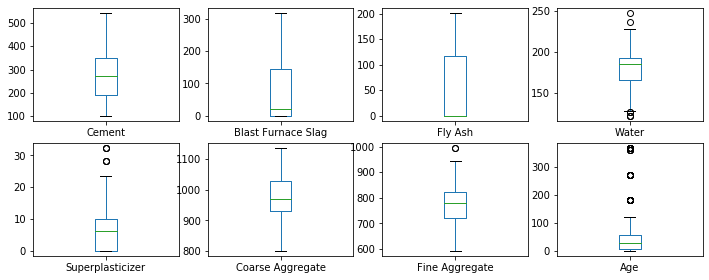

In [10]:
# boxplot
x_train_box = x_train_no_unit.plot(
    kind="box",
    subplots=True,
    figsize=(12, 12),
    layout=(5, 4),
    sharex=False,
    sharey=False,
)

We can see that there are some outliers in some of the columns, we might want to remove those.

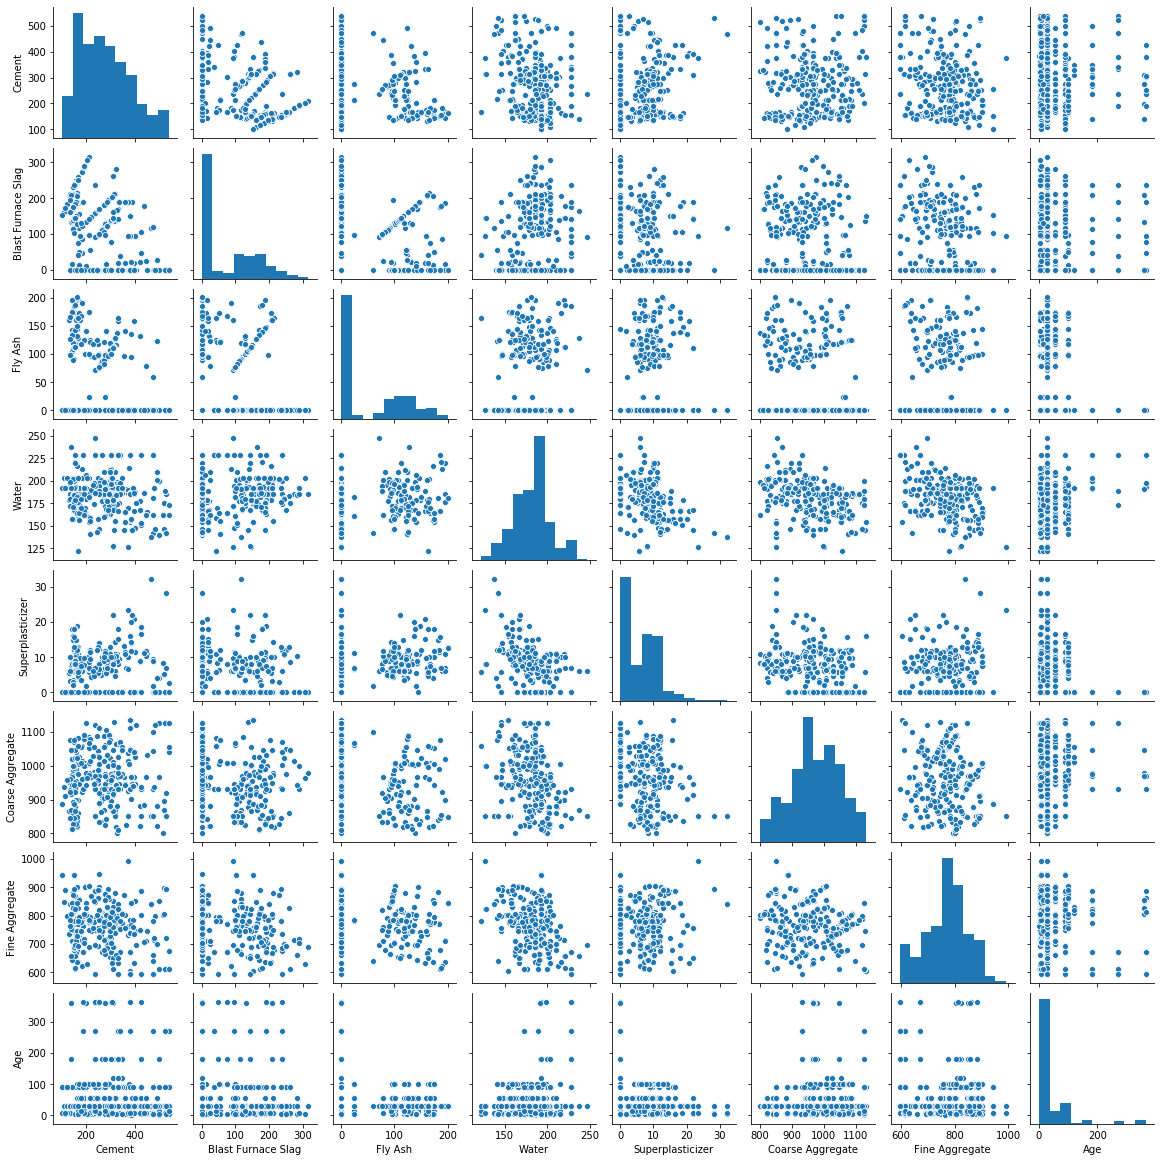

In [11]:
# pairplot, if you right click and choose view image you can zoom into the different columns.
sns = sb.pairplot(x_train_no_unit, height=2.0)

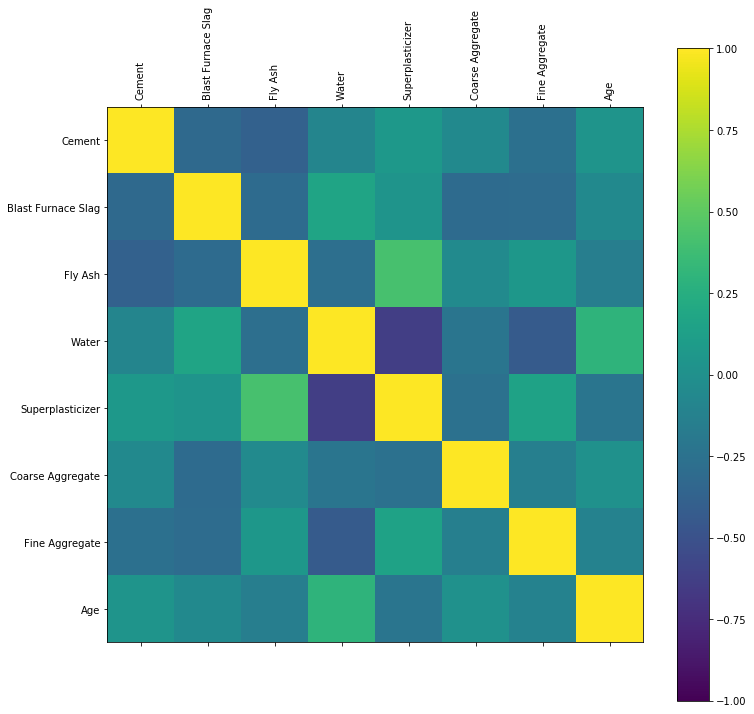

In [10]:
# correlation plot
feature_names = list(x_train_no_unit)  
correlations = x_train_no_unit.corr()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(feature_names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(feature_names)
ax.set_xticklabels(feature_names, rotation=90)

# comment the two lines below if you are using matplotlib >= 3.1.2, <= 3.1.0
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [22]:
# remove outliers (this was not used in our best results)
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3-Q1
mask = ((x_train < (Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR))).any(axis=1)
print("Observations BEFORE removing outliers:", x_train.shape[0])
x_train = x_train[~mask]
y_train = y_train[~mask]
# X = X.values
# _test = x_test.values
print("Observations AFTER removing outliers:", x_train.shape[0])

Observations BEFORE removing outliers: 618
Observations AFTER removing outliers: 569


In [11]:
# find feature importance using DecisionTreeRegressor and transform data (not used)
regr = DecisionTreeRegressor(criterion="mae", random_state=0)
selector = SelectFromModel(regr)
selector.fit(x_train, y_train)
x_train_trans = selector.transform(x_train)
x_test_trans = selector.transform(x_test)

In [12]:
# print out the features that were kept by the DecisionTreeRegressor
filt = selector.get_support()
column_names = list(x_train_no_unit)
chosen_columns = list(compress(column_names, filt))
print(chosen_columns)

['Cement', 'Age']


In [12]:
# StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# MinMaxScaler (not used in best results)
scaler = MinMaxScaler((0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
# use GridSearchCV to find optimal hyperparameters for GradientBoostingRegressor
regr = GradientBoostingRegressor()
parameters = {
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    "n_estimators": [100, 500, 1000, 2000, 5000, 10000],
}
search = GridSearchCV(
    regr, param_grid=parameters, scoring="r2", cv=5, n_jobs=-1, verbose=1
)
search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.2min finished
C:\Users\hej\Miniconda3\envs\skola\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [14]:
# show best score and the chosen hyperparameters for GradientBoostingRegressor
print("Best score:", search.best_score_)
print("Best parameters:",search.best_params_)

Best score: 0.9055826412051831
Best parameters: {'learning_rate': 0.01, 'n_estimators': 10000}


In [15]:
# elasticNet pipeline
param_alpha = [0.00001, 0.0001, 0.001, 0.01, 0.5, 0.1, 1]
param_ratio = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
param_grid = [
    {"elasticnet__alpha": param_alpha, "elasticnet__l1_ratio": param_ratio}
]
elnet_pipe = make_pipeline(StandardScaler(), ElasticNet())

In [16]:
# elasticNet gridsearch
elnet_search = GridSearchCV(
    estimator=elnet_pipe,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1,
)                                                

In [17]:
# fit elasticNet 
elnet_search.fit(x_train, y_train)  

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('elasticnet',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                                                   selection='cyclic',
           

In [18]:
# show best score and the chosen hyperparameters for elasticNet
print("Best score:", elnet_search.best_score_)
print("Best parameters:", elnet_search.best_params_)

Best score: 0.5675444140321406
Best parameters: {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.1}


In [17]:
# keras ANN
# we just tested different number of layers, nodes, optimizers and loss functions
# we also tried removing features and outliers but that made the result worse
sample_vector_length = x_train.shape[1]
model = Sequential(
    [
        Dense(2000, activation="relu", input_shape=(sample_vector_length,)),
        Dense(2000, activation="relu"),
        Dense(2000, activation="relu"),
        Dense(1),
    ]
)
model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss="mse",
    metrics=[r_square],
)

In [18]:
# fit model
history = model.fit(
    x_train,
    y_train,
    epochs=300,
    validation_split=0.2,
    batch_size=25,
    verbose=0,
)

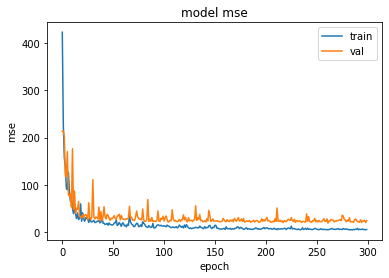

In [19]:
# plot mse metric
epochs_from_end = 300
epoch_x_values = list(
    range(
        len(history.history["loss"]) - epochs_from_end,
        len(history.history["loss"]),
    )
)
plt.plot(epoch_x_values, history.history["loss"][-epochs_from_end:])
plt.plot(epoch_x_values, history.history["val_loss"][-epochs_from_end:])
plt.title("model mse")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper right")
plt.show()

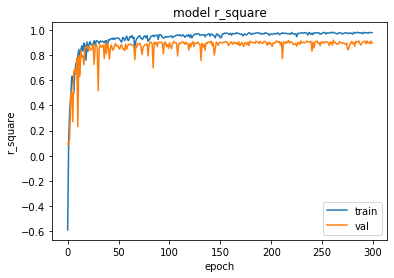

In [20]:
# plot r^2 metric
epochs_from_end = 300
epoch_x_values = list(
    range(
        len(history.history["r_square"]) - epochs_from_end,
        len(history.history["r_square"]),
    )
)
plt.plot(epoch_x_values, history.history["r_square"][-epochs_from_end:])
plt.plot(epoch_x_values, history.history["val_r_square"][-epochs_from_end:])
plt.title("model r_square")
plt.ylabel("r_square")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="lower right")
plt.show()

In [21]:
# show some info about model and training to save for later reference
print("StandardScaler\n")
print(model.summary(), "\n")
print(history.params, "\n")
print(
    f"mean train loss last 10 epochs: {np.mean(history.history['loss'][-50:])}"
)
print(
    f"mean val loss last 10 epochs: {np.mean(history.history['val_loss'][-50:])}"
)
print(
    f"mean train r^2 last 10 epochs: {np.mean(history.history['r_square'][-50:])}"
)
print(
    f"mean val r^2 last 10 epochs: {np.mean(history.history['val_r_square'][-50:])}"
)

StandardScaler

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2000)              18000     
_________________________________________________________________
dense_9 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_10 (Dense)             (None, 2000)              4002000   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2001      
Total params: 8,024,001
Trainable params: 8,024,001
Non-trainable params: 0
_________________________________________________________________
None 

{'verbose': 0, 'epochs': 300, 'steps': 20} 

mean train loss last 10 epochs: 6.364300756454468
mean val loss last 10 epochs: 24.777511138916015
mean train r^2 last 10 epochs: 0.9737379086017609
mean val r^2 last 10 epoc

In [ ]:
# train new model on all traindata
pred_model = Sequential(
    [
        Dense(2000, activation="relu", input_shape=(sample_vector_length,)),
        Dense(2000, activation="relu"),
        Dense(2000, activation="relu"),
        Dense(1),
    ]
)
pred_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss="mse",
    metrics=[r_square],
)

In [ ]:
pred_history = pred_model.fit(
    x_train, y_train, epochs=300, batch_size=25, verbose=1
)

In [ ]:
# make prediction on test data (not used in best result, might have overfitted?)
y_pred = pred_model.predict(x_test)

In [22]:
# make prediction on test data using first model
y_pred = model.predict(x_test)

In [32]:
# create the csv file for upload to kaggle
dfscore = pd.DataFrame(y_pred)
ID = np.arange(0, len(dfscore), dtype=np.int64)
dfID = pd.DataFrame(ID)
dfscore.columns = ["Predicted"]
dfID.columns = ["Id"]
final_df = pd.concat([dfID, dfscore], axis=1)
final_df.to_csv("Julius&Markus_comp1_ver1.csv", sep=",", index=False)